In [3]:
import h5py
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import gc
%matplotlib inline

In [4]:
verbose = True
if verbose :
    import pprint
    from IPython.core.display import display
    prettyPrinter = pprint.PrettyPrinter(indent=4)

In [5]:
#stellarCircsFile = h5py.File('./illustrisAuxCatalogues/stellar_circs.hdf5', 'r')
nonparMorphologies = h5py.File('./illustrisAuxCatalogues/nonparametric_morphologies.hdf5', 'r')

In [6]:
sdssBands = 'ugi'

In [7]:
for sdssBand in sdssBands :
    nonparMorphologies['Snapshot_135/' + sdssBand + 'SDSS' ].visit(lambda name : print(sdssBand.upper(),name))

U C_cam0
U C_cam1
U C_cam2
U C_cam3
U Gini_cam0
U Gini_cam1
U Gini_cam2
U Gini_cam3
U M20_cam0
U M20_cam1
U M20_cam2
U M20_cam3
U RE_cam0
U RE_cam1
U RE_cam2
U RE_cam3
U RP_cam0
U RP_cam1
U RP_cam2
U RP_cam3
G C_cam0
G C_cam1
G C_cam2
G C_cam3
G Gini_cam0
G Gini_cam1
G Gini_cam2
G Gini_cam3
G M20_cam0
G M20_cam1
G M20_cam2
G M20_cam3
G RE_cam0
G RE_cam1
G RE_cam2
G RE_cam3
G RP_cam0
G RP_cam1
G RP_cam2
G RP_cam3
I C_cam0
I C_cam1
I C_cam2
I C_cam3
I Gini_cam0
I Gini_cam1
I Gini_cam2
I Gini_cam3
I M20_cam0
I M20_cam1
I M20_cam2
I M20_cam3
I RE_cam0
I RE_cam1
I RE_cam2
I RE_cam3
I RP_cam0
I RP_cam1
I RP_cam2
I RP_cam3


In [35]:
zeroRedshiftSnapshot = nonparMorphologies['Snapshot_135']
camDataDicts = {'g' : {0 : {} ,1 : {}, 2 : {}, 3 : {}},
                'i' : {0 : {} ,1 : {}, 2 : {}, 3 : {}},
                'u' : {0 : {} ,1 : {}, 2 : {}, 3 : {}}}
for itemName, itemData in zeroRedshiftSnapshot.items() :
    if isinstance(itemData, h5py._hl.group.Group) and 'SDSS' in itemName:
        print (itemName, itemData, type(itemData))
        for subItemName, subItemData in itemData.items() :
            for key in camDataDicts[itemName[0]] :
                if subItemName.endswith(str(key)) :
                    camDataDicts[itemName[0]][key].update({subItemName[0:-5] : [datum for datum in subItemData]})
    elif isinstance(itemData, h5py._hl.dataset.Dataset) :
            print (itemName, itemData.shape, itemData.dtype)

SubfindID_cam0 (10654,) int32
SubfindID_cam1 (10618,) int32
SubfindID_cam2 (10639,) int32
SubfindID_cam3 (10620,) int32
gSDSS <HDF5 group "/Snapshot_135/gSDSS" (20 members)> <class 'h5py._hl.group.Group'>
iSDSS <HDF5 group "/Snapshot_135/iSDSS" (20 members)> <class 'h5py._hl.group.Group'>
uSDSS <HDF5 group "/Snapshot_135/uSDSS" (20 members)> <class 'h5py._hl.group.Group'>


In [36]:
camDataFrames = {'g' : {0 : None ,1 : None, 2 : None, 3 : None},
                'i' : {0 : None ,1 : None, 2 : None, 3 : None},
                'u' : {0 : None ,1 : None, 2 : None, 3 : None}}

for band, camDicts in camDataDicts.items() :
    for cam in camDicts :
        camDataFrames[band][cam] = pd.DataFrame.from_dict(camDataDicts[band][cam])

In [37]:
for band in camDataFrames:
    camDataFrames[band].update({'allCams' : pd.concat([frame for _, frame in camDataFrames[band].items()])})

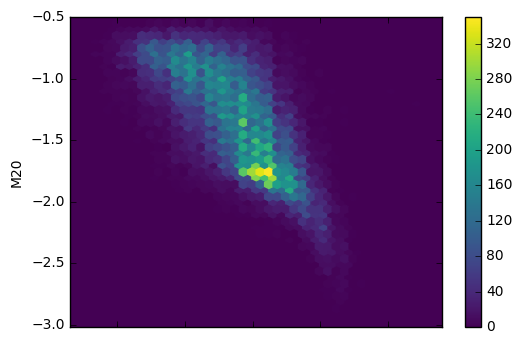

In [48]:
camDataFrames['g']['allCams'].plot.hexbin(x='Gini', y='M20', gridsize=44, cmap='viridis')